In [1]:
import pandas as pd
#Scraping With GetOldTweets3
#!pip install GetOldTweets3
#import GetOldTweets3 as got
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
nltk.download('wordnet')
import matplotlib.pyplot as plt
from textblob import TextBlob
import codecs
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pandas_datareader import data as web
import datetime
import numpy as np

[nltk_data] Downloading package wordnet to C:\Users\Abhisha
[nltk_data]     Burande\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
yoga = pd.read_excel("C:/Users/Abhisha Burande/Downloads/GoHundred_title_data_yoga.xlsx")
zumba = pd.read_excel("C:/Users/Abhisha Burande/Downloads/GoHundred_title_data_zumba.xlsx")
meditation = pd.read_excel("C:/Users/Abhisha Burande/Downloads/GoHundred_title_data_meditation.xlsx")
exercise = pd.read_excel("C:/Users/Abhisha Burande/Downloads/GoHundred_title_data_exercise.xlsx")
gym = pd.read_excel("C:/Users/Abhisha Burande/Downloads/GoHundred_title_data_gym.xlsx")
pilates = pd.read_excel("C:/Users/Abhisha Burande/Downloads/GoHundred_title_data_pilates.xlsx")
bodyweight = pd.read_excel("C:/Users/Abhisha Burande/Downloads/GoHundred_title_data_bodyweight.xlsx")
crossfit = pd.read_excel("C:/Users/Abhisha Burande/Downloads/GoHundred_title_data_crossfit.xlsx")


In [3]:
df=pd.concat([yoga,exercise,meditation,zumba,gym,pilates,bodyweight,crossfit],)
df.head(2)

,Unnamed: 0,social_type,title,date,url,sentiment,word_count,no_punctuation,cleaned_text
0,0,facebook,Monday Yoga Flow + Intention Setting now on Yo...,2020-06-01,https://www.facebook.com/rachelsyoga/videos/30...,NEUTRAL,14,Monday Yoga Flow Intention Setting now on Yog...,monday yoga flow intention setting yogagirl jo...
1,1,facebook,I have felt FANTASTIC in my body all throughou...,2020-05-29,https://www.facebook.com/128573473884902/posts...,POSITIVE,146,I have felt FANTASTIC in my body all throughou...,felt fantastic body throughout quarantine real...


In [49]:
data = df[['date', 'social_type']].groupby('date').count()
data

,social_type
date,
2019-11-12,1
2019-11-13,2
2019-11-14,1
2019-11-15,1
2019-11-16,1
...,...
2020-05-29,22
2020-05-30,26
2020-05-31,48


In [5]:
cdata=df[['date','cleaned_text']]
cdata

,date,cleaned_text
0,2020-06-01,monday yoga flow intention setting yogagirl jo...
1,2020-05-29,felt fantastic body throughout quarantine real...
2,2020-05-29,live shaking meditation dance party starting y...
3,2020-05-29,feeling low anxious overwhelmed today shake
4,2020-05-27,tune hublive today pm instagram watch flow dha...
...,...,...
135,2020-06-02,michigan best workout crossfit mlive
136,2020-06-02,crossfit angeles google maps
137,2020-06-02,eat like fittest earth outside online
138,2020-06-02,paradiso crossfit venice best crossfit gym per...


In [6]:
cdata=cdata.groupby('date')['cleaned_text'].agg(lambda x: ' '.join(x.astype(str))).reset_index()

In [7]:
cdata

,date,cleaned_text
0,2019-11-12,meghan faulkenberry gritting teeth final km no...
1,2019-11-13,pilates sport going road trip december brad tw...
2,2019-11-14,week get unfiltered delia buckmaster making to...
3,2019-11-15,episode delia buckmaster get dirty truth pulls...
4,2019-11-16,video fantastic weekend pfs usa triathlon cont...
...,...,...
177,2020-05-29,felt fantastic body throughout quarantine real...
178,2020-05-30,wall stretches relieve back pain know past mon...
179,2020-05-31,hey wonder yogiz self sunday dayyogachallenge ...
180,2020-06-01,monday yoga flow intention setting yogagirl jo...


In [8]:
cdata["Comp"] = ''
cdata["Negative"] = ''
cdata["Neutral"] = ''
cdata["Positive"] = ''
cdata

,date,cleaned_text,Comp,Negative,Neutral,Positive
0,2019-11-12,meghan faulkenberry gritting teeth final km no...,,,,
1,2019-11-13,pilates sport going road trip december brad tw...,,,,
2,2019-11-14,week get unfiltered delia buckmaster making to...,,,,
3,2019-11-15,episode delia buckmaster get dirty truth pulls...,,,,
4,2019-11-16,video fantastic weekend pfs usa triathlon cont...,,,,
...,...,...,...,...,...,...
177,2020-05-29,felt fantastic body throughout quarantine real...,,,,
178,2020-05-30,wall stretches relieve back pain know past mon...,,,,
179,2020-05-31,hey wonder yogiz self sunday dayyogachallenge ...,,,,
180,2020-06-01,monday yoga flow intention setting yogagirl jo...,,,,


In [9]:
cdata =cdata.dropna()
cdata

,date,cleaned_text,Comp,Negative,Neutral,Positive
0,2019-11-12,meghan faulkenberry gritting teeth final km no...,,,,
1,2019-11-13,pilates sport going road trip december brad tw...,,,,
2,2019-11-14,week get unfiltered delia buckmaster making to...,,,,
3,2019-11-15,episode delia buckmaster get dirty truth pulls...,,,,
4,2019-11-16,video fantastic weekend pfs usa triathlon cont...,,,,
...,...,...,...,...,...,...
177,2020-05-29,felt fantastic body throughout quarantine real...,,,,
178,2020-05-30,wall stretches relieve back pain know past mon...,,,,
179,2020-05-31,hey wonder yogiz self sunday dayyogachallenge ...,,,,
180,2020-06-01,monday yoga flow intention setting yogagirl jo...,,,,


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in cdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', cdata.loc[indexx, 'cleaned_text'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        cdata.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        cdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        cdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        cdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (cdata.loc[indexx, 'cleaned_text'])
        print (indexx)


C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [11]:
cdata

,date,cleaned_text,Comp,Negative,Neutral,Positive
0,2019-11-12,meghan faulkenberry gritting teeth final km no...,0.743,0,0.73,0.27
1,2019-11-13,pilates sport going road trip december brad tw...,0,0,1,0
2,2019-11-14,week get unfiltered delia buckmaster making to...,0.8126,0.101,0.598,0.302
3,2019-11-15,episode delia buckmaster get dirty truth pulls...,0.0258,0.172,0.592,0.237
4,2019-11-16,video fantastic weekend pfs usa triathlon cont...,0.872,0,0.476,0.524
...,...,...,...,...,...,...
177,2020-05-29,felt fantastic body throughout quarantine real...,0.998,0.039,0.687,0.275
178,2020-05-30,wall stretches relieve back pain know past mon...,0.9935,0.058,0.671,0.271
179,2020-05-31,hey wonder yogiz self sunday dayyogachallenge ...,0.9987,0.053,0.681,0.265
180,2020-06-01,monday yoga flow intention setting yogagirl jo...,0.999,0.061,0.743,0.196


% of positive tweets=  90.65934065934066
% of negative tweets=  2.197802197802198
% of neutral tweets=  7.142857142857142


[]

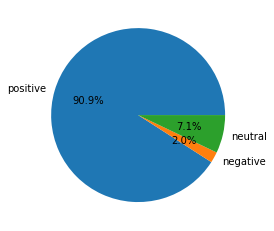

In [12]:
import matplotlib.pyplot as plt
posi=0
nega=0
neut=0
for i in range (0,len(cdata)):
    get_val=cdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
    if(float(get_val==(0))):
        neut=neut+1
posper=(posi/(len(cdata)))*100
negper=(nega/(len(cdata)))*100
neuper=(neut/(len(cdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
print("% of neutral tweets= ",neuper)
arr=np.asarray([posper,negper,neuper], dtype=int)
plt.pie(arr,labels=['positive','negative','neutral'],autopct='%1.1f%%')
plt.plot()

In [13]:
#cdata = cdata.set_index('date')
#cdata

In [14]:
df_=cdata[['date','Comp','Negative','Neutral','Positive']].copy()
df_

,date,Comp,Negative,Neutral,Positive
0,2019-11-12,0.743,0,0.73,0.27
1,2019-11-13,0,0,1,0
2,2019-11-14,0.8126,0.101,0.598,0.302
3,2019-11-15,0.0258,0.172,0.592,0.237
4,2019-11-16,0.872,0,0.476,0.524
...,...,...,...,...,...
177,2020-05-29,0.998,0.039,0.687,0.275
178,2020-05-30,0.9935,0.058,0.671,0.271
179,2020-05-31,0.9987,0.053,0.681,0.265
180,2020-06-01,0.999,0.061,0.743,0.196


In [15]:
df_

,date,Comp,Negative,Neutral,Positive
0,2019-11-12,0.743,0,0.73,0.27
1,2019-11-13,0,0,1,0
2,2019-11-14,0.8126,0.101,0.598,0.302
3,2019-11-15,0.0258,0.172,0.592,0.237
4,2019-11-16,0.872,0,0.476,0.524
...,...,...,...,...,...
177,2020-05-29,0.998,0.039,0.687,0.275
178,2020-05-30,0.9935,0.058,0.671,0.271
179,2020-05-31,0.9987,0.053,0.681,0.265
180,2020-06-01,0.999,0.061,0.743,0.196


In [16]:
train_start_index = 0
train_end_index = 90
test_start_index =91
test_end_index =181
train = df_.iloc[train_start_index : train_end_index]
test  = df_.iloc[test_start_index : test_end_index]

In [17]:
train

,date,Comp,Negative,Neutral,Positive
0,2019-11-12,0.743,0,0.73,0.27
1,2019-11-13,0,0,1,0
2,2019-11-14,0.8126,0.101,0.598,0.302
3,2019-11-15,0.0258,0.172,0.592,0.237
4,2019-11-16,0.872,0,0.476,0.524
...,...,...,...,...,...
85,2020-02-27,0.6705,0,0.792,0.208
86,2020-02-28,0.8074,0.061,0.716,0.223
87,2020-02-29,0.8402,0,0.727,0.273
88,2020-03-01,0.93,0.036,0.614,0.35


In [18]:
test

,date,Comp,Negative,Neutral,Positive
91,2020-03-04,0.979,0,0.727,0.273
92,2020-03-05,0.7501,0.06,0.727,0.213
93,2020-03-06,0.9818,0.099,0.573,0.328
94,2020-03-07,0.8834,0.122,0.555,0.324
95,2020-03-08,0.8438,0.177,0.529,0.294
...,...,...,...,...,...
176,2020-05-28,0.9881,0,0.726,0.274
177,2020-05-29,0.998,0.039,0.687,0.275
178,2020-05-30,0.9935,0.058,0.671,0.271
179,2020-05-31,0.9987,0.053,0.681,0.265


In [19]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [20]:
print(numpy_df_train)

[[0.    0.27 ]
 [0.    0.   ]
 [0.101 0.302]
 [0.172 0.237]
 [0.    0.524]
 [0.    0.   ]
 [0.    0.   ]
 [0.    0.143]
 [0.    0.527]
 [0.    0.393]
 [0.06  0.255]
 [0.    0.517]
 [0.    0.209]
 [0.474 0.117]
 [0.    0.208]
 [0.    0.704]
 [0.    0.225]
 [0.855 0.   ]
 [0.169 0.115]
 [0.    0.333]
 [0.    0.634]
 [0.    0.463]
 [0.    0.363]
 [0.    0.   ]
 [0.    0.474]
 [0.221 0.414]
 [0.    0.333]
 [0.041 0.313]
 [0.    0.4  ]
 [0.    0.22 ]
 [0.    0.   ]
 [0.    0.289]
 [0.    0.   ]
 [0.    0.759]
 [0.    0.   ]
 [0.    0.   ]
 [0.    0.   ]
 [0.    0.098]
 [0.169 0.073]
 [0.    0.369]
 [0.    0.2  ]
 [0.13  0.193]
 [0.112 0.199]
 [0.    0.265]
 [0.101 0.261]
 [0.103 0.297]
 [0.    0.219]
 [0.    0.393]
 [0.    0.355]
 [0.    0.452]
 [0.    0.399]
 [0.04  0.331]
 [0.    0.274]
 [0.    0.864]
 [0.    0.192]
 [0.082 0.297]
 [0.    0.543]
 [0.    0.126]
 [0.021 0.311]
 [0.    0.383]
 [0.087 0.271]
 [0.    0.   ]
 [0.    0.438]
 [0.    0.432]
 [0.    0.299]
 [0.    0.212]
 [0.    0.

In [21]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [22]:
print(numpy_df_test)

[[0.    0.273]
 [0.06  0.213]
 [0.099 0.328]
 [0.122 0.324]
 [0.177 0.294]
 [0.    0.   ]
 [0.131 0.133]
 [0.    0.381]
 [0.    0.578]
 [0.    0.527]
 [0.    0.352]
 [0.208 0.305]
 [0.044 0.212]
 [0.076 0.353]
 [0.033 0.382]
 [0.024 0.383]
 [0.    0.27 ]
 [0.049 0.277]
 [0.083 0.279]
 [0.018 0.27 ]
 [0.    0.224]
 [0.04  0.279]
 [0.026 0.321]
 [0.08  0.351]
 [0.027 0.237]
 [0.    0.178]
 [0.035 0.319]
 [0.01  0.407]
 [0.02  0.297]
 [0.039 0.336]
 [0.018 0.247]
 [0.024 0.332]
 [0.011 0.36 ]
 [0.033 0.482]
 [0.079 0.329]
 [0.027 0.163]
 [0.056 0.254]
 [0.    0.374]
 [0.017 0.287]
 [0.026 0.224]
 [0.117 0.297]
 [0.044 0.387]
 [0.085 0.233]
 [0.062 0.31 ]
 [0.009 0.293]
 [0.012 0.276]
 [0.018 0.238]
 [0.053 0.333]
 [0.026 0.325]
 [0.096 0.233]
 [0.059 0.223]
 [0.065 0.342]
 [0.057 0.204]
 [0.035 0.199]
 [0.05  0.334]
 [0.007 0.342]
 [0.028 0.28 ]
 [0.004 0.285]
 [0.025 0.286]
 [0.035 0.277]
 [0.041 0.356]
 [0.036 0.189]
 [0.046 0.324]
 [0.041 0.252]
 [0.047 0.27 ]
 [0.042 0.282]
 [0.026 0.

In [23]:
y_train = pd.DataFrame(train['Comp'])
y_test = pd.DataFrame(test['Comp'])
print(y_train)

      Comp
0    0.743
1        0
2   0.8126
3   0.0258
4    0.872
..     ...
85  0.6705
86  0.8074
87  0.8402
88    0.93
89  0.9902

[90 rows x 1 columns]


In [24]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [25]:
prediction_train, bias, contributions = ti.predict(rf, numpy_df_train)

In [26]:
print(prediction_train)

[[ 0.78525   ]
 [ 0.        ]
 [ 0.88806   ]
 [ 0.13302   ]
 [ 0.91952   ]
 [ 0.        ]
 [ 0.        ]
 [ 0.2805    ]
 [ 0.9584    ]
 [ 0.82273667]
 [ 0.85541   ]
 [ 0.94552   ]
 [ 0.57481   ]
 [-0.52844   ]
 [ 0.62221   ]
 [ 0.88435   ]
 [ 0.7648    ]
 [-0.48674   ]
 [-0.31058   ]
 [ 0.6922    ]
 [ 0.7668    ]
 [ 0.67888   ]
 [ 0.75274   ]
 [ 0.        ]
 [ 0.56374   ]
 [ 0.64364   ]
 [ 0.6922    ]
 [ 0.95317   ]
 [ 0.78743   ]
 [ 0.76275   ]
 [ 0.        ]
 [ 0.9177    ]
 [ 0.        ]
 [ 0.8009    ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.05398   ]
 [-0.51232   ]
 [ 0.80834   ]
 [ 0.3764    ]
 [ 0.43005   ]
 [ 0.47893   ]
 [ 0.84302   ]
 [ 0.89846   ]
 [ 0.91607   ]
 [ 0.61461   ]
 [ 0.82273667]
 [ 0.73635   ]
 [ 0.6242    ]
 [ 0.90248   ]
 [ 0.87263   ]
 [ 0.82599   ]
 [ 0.8669    ]
 [ 0.50723917]
 [ 0.87835   ]
 [ 0.95684   ]
 [ 0.43466   ]
 [ 0.95237   ]
 [ 0.85798   ]
 [ 0.91226   ]
 [ 0.        ]
 [ 0.93852   ]
 [ 0.94988   ]
 [ 0.98206   ]
 [ 0.80692   ]
 [ 0.64010

In [27]:
idx_train=y_train.index
predictions_df_1 = pd.DataFrame(data=prediction_train[0:],index = idx_train,columns=['Comp'])

In [28]:
predictions_df_1

,Comp
0,0.78525
1,0.00000
2,0.88806
3,0.13302
4,0.91952
...,...
85,0.62221
86,0.83523
87,0.83123
88,0.94069


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text major ticklabel objects>)

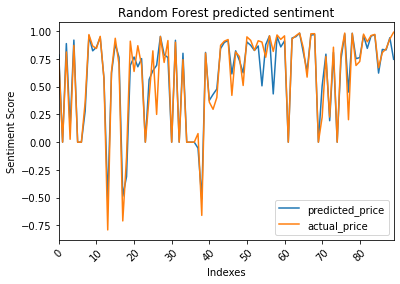

In [29]:
ax = predictions_df_1.rename(columns={"Comp": "predicted_price"}).plot(title='Random Forest predicted sentiment')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Sentiment Score")
fig = y_train.rename(columns={"Comp": "actual_price"}).plot(ax = ax).get_figure()#actual value
plt.xticks(rotation=45)

In [30]:
prediction_test, bias, contributions = ti.predict(rf, numpy_df_test)

In [31]:
print(prediction_test)

[[0.83123  ]
 [0.75537  ]
 [0.85496  ]
 [0.63392  ]
 [0.21269  ]
 [0.       ]
 [0.21493  ]
 [0.85798  ]
 [0.96392  ]
 [0.9584   ]
 [0.73635  ]
 [0.27284  ]
 [0.84363  ]
 [0.93523  ]
 [0.95535  ]
 [0.96537  ]
 [0.78525  ]
 [0.91263  ]
 [0.91446  ]
 [0.90431  ]
 [0.7648   ]
 [0.90263  ]
 [0.94984  ]
 [0.93394  ]
 [0.84451  ]
 [0.7455075]
 [0.93841  ]
 [0.87704  ]
 [0.90148  ]
 [0.93586  ]
 [0.87493  ]
 [0.89043  ]
 [0.9705   ]
 [0.85142  ]
 [0.86437  ]
 [0.87147  ]
 [0.85541  ]
 [0.80519  ]
 [0.89344  ]
 [0.85803  ]
 [0.59465  ]
 [0.95984  ]
 [0.80745  ]
 [0.87866  ]
 [0.92542  ]
 [0.91272  ]
 [0.86171  ]
 [0.89562  ]
 [0.89147  ]
 [0.82628  ]
 [0.83523  ]
 [0.9565   ]
 [0.6601   ]
 [0.69967  ]
 [0.8939   ]
 [0.7379   ]
 [0.90961  ]
 [0.8709   ]
 [0.89033  ]
 [0.90394  ]
 [0.95105  ]
 [0.85361  ]
 [0.88784  ]
 [0.88347  ]
 [0.91043  ]
 [0.90686  ]
 [0.96879  ]
 [0.95347  ]
 [0.59216  ]
 [0.86171  ]
 [0.80087  ]
 [0.80745  ]
 [0.87764  ]
 [0.87045  ]
 [0.93517  ]
 [0.92041  ]
 [0.95237  ]

In [32]:
idx=y_test.index
predictions_df_ = pd.DataFrame(data=prediction_test[0:],index = idx,columns=['Comp'])

In [33]:
predictions_df_

,Comp
91,0.83123
92,0.75537
93,0.85496
94,0.63392
95,0.21269
...,...
176,0.82599
177,0.90263
178,0.91165
179,0.88415


(array([ 90., 100., 110., 120., 130., 140., 150., 160., 170., 180.]),
 <a list of 10 Text major ticklabel objects>)

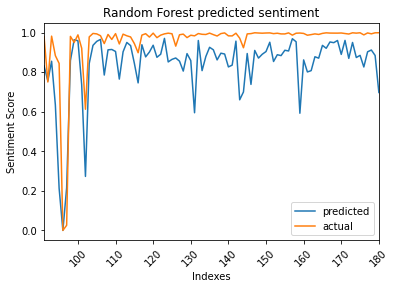

In [34]:
ax = predictions_df_.rename(columns={"Comp": "predicted"}).plot(title='Random Forest predicted sentiment')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Sentiment Score")
fig = y_test.rename(columns={"Comp": "actual"}).plot(ax = ax).get_figure()#actual value
plt.xticks(rotation=45)

In [35]:
errors = abs(prediction_test- y_test)
print('Metrics for Random Forest Trained on Expanded Data')
print('Mean absolute error:', round(np.mean(errors), 2), 'degrees.')


Metrics for Random Forest Trained on Expanded Data
Mean absolute error: Comp    0.12
dtype: float64 degrees.


In [36]:
import fbprophet
test = test.rename(columns={'date': 'ds', 'Comp': 'y'})
fitness_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
fitness_prophet.fit(test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
fitness_forecast = fitness_prophet.make_future_dataframe(periods=90, freq='D')
# Make predictions
fitness_forecast = fitness_prophet.predict(fitness_forecast)

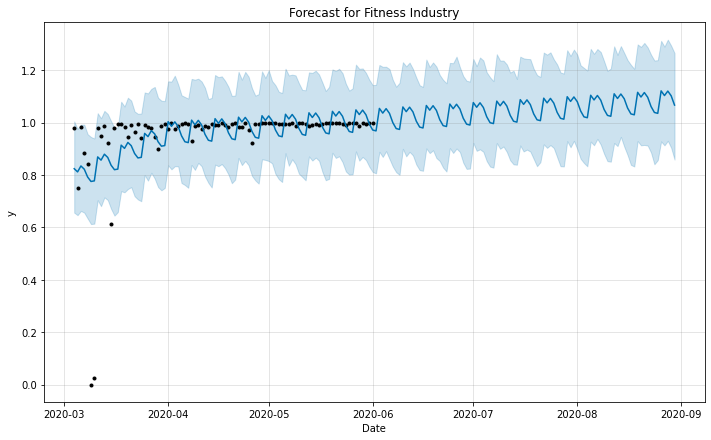

In [38]:
fitness_prophet.plot(fitness_forecast, xlabel = 'Date')
plt.title('Forecast for Fitness Industry');

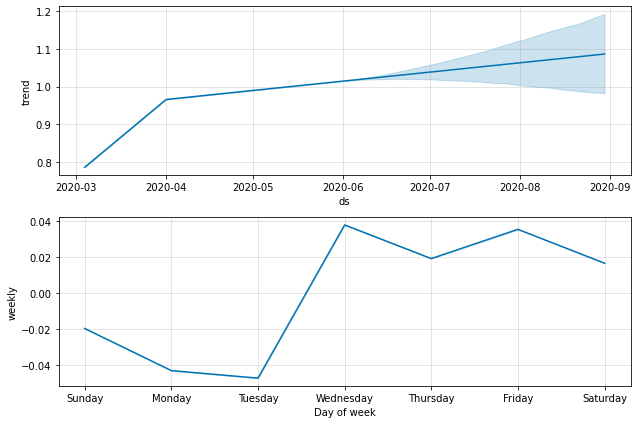

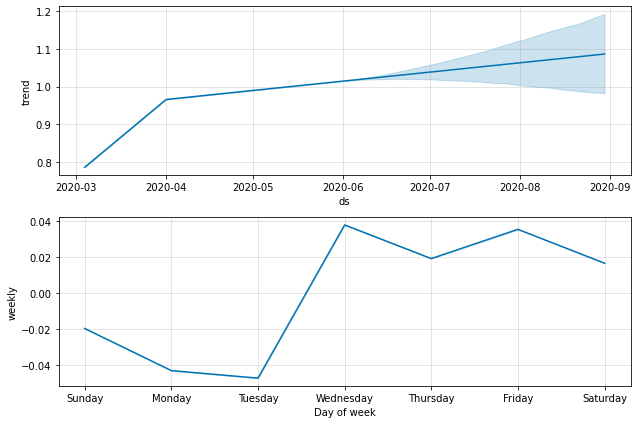

In [39]:
fitness_prophet.plot_components(fitness_forecast)

In [40]:
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
pyoff.init_notebook_mode(connected=True)

In [41]:
scaler = MinMaxScaler()
scaler.fit(predictions_df_)
predict = scaler.transform(predictions_df_)

In [42]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(predict, predict, length=n_input, batch_size=6)

In [43]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [44]:
history = model.fit_generator(generator,epochs=100,verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/100
13/13 [==============================] - 0s 11ms/step - loss: 0.2887
Epoch 2/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0444
Epoch 3/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0132
Epoch 4/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0140
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0165
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0141
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0133
Epoch 8/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0121
Epoch 9/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0124
Epoch 10/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0147
Epoch 11/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0125
Epoch 12/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0134
Epoch 13/100
13/13 [=====

In [45]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plot_data = [
    go.Scatter(
        x=hist['epoch'],
        y=hist['loss'],
        name='loss'
    )
    
]

plot_layout = go.Layout(
        title='Training loss'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [46]:
pred_list = []

batch = predict[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [47]:
add_dates = [predict.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

df_proj.tail(12)

In [ ]:
plot_data = [
    go.Scatter(
        x=df_proj.index,
        y=df_proj['Sales'],
        name='actual'
    ),
    go.Scatter(
        x=df_proj.index,
        y=df_proj['Prediction'],
        name='prediction'
    )
]

plot_layout = go.Layout(
        title='Shampoo sales prediction'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)